# Raw text from indentures

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk, string
import seaborn as sns

In [4]:
# examples from ACIS1506.20150416.ccc83295-ef68-c242-a04f-a5b8a963b8a9.7a36f988b6fb5f6cf52e494295906b8a

Refinance1 =  "In connection with a Refinancing of one or more (but not all) of the Secured Notes, Interest Proceeds in an amount equal to the lesser of (a) the amount of accrued interest on the Classes being refinanced (after giving effect to payments under the Priority of Interest Proceeds if the Redemption Date would have been a Payment Date without regard to the Refinancing) and (b) the amount the Portfolio Manager reasonably determines would have been available for distribution under the Priority of Payments for the payment of accrued interest on the Classes being refinanced on the next subsequent Payment Date as if such Notes had not been refinanced."

Cancellation1 = """(a) Any Holder may tender any Notes or beneficial interests in Notes owned by such Holder for cancellation by the Trustee without receiving any payment (any such surrendered Notes or beneficial interests in Notes, “Surrendered Notes”). For the avoidance of doubt, Notes surrendered by the Issuer after purchase pursuant to Section 2.13 shall not constitute “Surrendered Notes.” The Issuer shall provide notice to the Co-Issuer, the Trustee and the Rating Agency of any Surrendered Notes tendered to it and the Trustee shall provide notice to the Applicable Issuers of any Surrendered Note tendered to it. Any such Surrendered Notes shall be submitted to the Trustee for cancellation; provided that, for purposes of calculation of the Overcollateralization Ratio and any calculation required by Section 5.1(g), any Surrendered Notes will be deemed to remain outstanding until all Notes of the applicable Class and each Class that is senior in right of principal payment thereto in the Note Payment Sequence have been retired or redeemed, having an Aggregate Outstanding Amount equal to the Aggregate Outstanding Amount as of the date of surrender, reduced proportionately with, and to the extent of, any payments of principal on Notes of the same Class thereafter.  (b) All Surrendered Notes and Notes that are surrendered for payment, registration of transfer, exchange or redemption, surrendered by the Issuer following purchase pursuant to Section 2.13, or deemed lost or stolen shall be promptly cancelled by the Trustee and may not be reissued or resold; provided that, in the event an anticipated Optional Redemption or Partial Redemption by Refinancing does not occur, Notes that are delivered in connection with such anticipated Optional Redemption or Partial Redemption by Refinancing shall be returned by the Trustee to the Person surrendering the same. Any such Notes shall, if surrendered to any Person other than the Trustee, be delivered to the Trustee. No Notes shall be authenticated in lieu of or in exchange for any Notes canceled as provided in this Section 2.10, except as expressly permitted hereunder. All canceled Notes held by the Trustee shall be destroyed by the Trustee in accordance with its standard policy, unless the Co-Issuers shall direct by an Issuer Order received prior to destruction that they be returned to it."""

# examples from ACASL132.20170725.f6e81d3b-671f-e7b7-63ef-4f6258f64bf8.be9827c3def852e86013998c0941d98f

Refinance2 = "A loan or an issuance of replacement securities, whose terms in each case will be negotiated by the Collateral Manager on behalf of the Issuer, from one or more financial institutions or purchasers to refinance the Secured Notes in connection with an Optional Redemption, it being understood that any rating of such replacement securities by a Rating Agency will be based on a credit analysis specific to such replacement securities and independent of the rating of the Secured Notes being refinanced."

Cancellation2  = "All Notes surrendered for payment, registration of transfer, exchange or redemption, or mutilated, defaced or deemed lost or stolen, shall be promptly canceled by the Trustee and may not be reissued or resold. No Note may be surrendered (including any surrender in connection with any abandonment, donation, gift, contribution or other event or circumstance) except (i) for payment as provided herein, (ii) for registration of transfer, exchange or redemption or (iii) for replacement in connection with any Note that is mutilated, defaced or deemed lost or stolen. Any such Notes shall, if surrendered to any Person other than the Trustee, be delivered to the Trustee. No Notes shall be authenticated or registered in lieu of or in exchange for any Notes canceled as provided in this Section 2.9, except as expressly permitted by this Indenture. All canceled Notes held by the Trustee shall be destroyed or held by the Trustee in accordance with its standard retention policy unless the Issuer shall direct by an Issuer Order received prior to destruction that they be returned to it."

#  examples from ALM6_1.20180611.b0eca308-20af-5a81-5bc5-a16f4bca5d7a.c6a25c15a03a42853fe1bc0eac9b00b3

Refinance3 = "A loan or an issuance of replacement securities, whose terms in each case will be negotiated by the Collateral Manager on behalf of the Issuer, from one or more financial institutions or purchasers to refinance the Notes in connection with an Optional Redemption."

Cancellation3 = """ All Notes surrendered for payment, cancellation pursuant to Section 9.8, registration of transfer, exchange or redemption, or mutilated, defaced or deemed lost or stolen, shall be promptly canceled by the Trustee and may not be reissued or resold. No Note may be surrendered (including in connection with any abandonment, donation, gift, contribution or other event or circumstance) except for payment as provided herein for cancellation pursuant to Section 9.8, for registration of transfer, exchange or redemption, or for replacement in connection with any Note mutilated, defaced or deemed lost or stolen. Any Notes surrendered for cancellation as permitted by this Section 2.9 shall, if surrendered to any Person other than the Trustee, be delivered to the Trustee. No Notes shall be authenticated in lieu of or in exchange for any Notes canceled as provided in this Section 2.9, except as expressly permitted by this Indenture. All canceled Notes held by the Trustee shall be destroyed or held by the Trustee in accordance with its standard retention policy unless the Applicable Issuers shall direct by an Issuer Order received prior to destruction that they be returned to it. Except in accordance with Article IX, the Issuer may not acquire any of the Notes (including any Notes voluntarily surrendered without payment or abandoned)."""

In [5]:
ref= [Refinance1, Refinance2, Refinance3]
cancel = [Cancellation1, Cancellation2, Cancellation3]

- Problem:

One topic may be divided into several parts in the indenture
    - Refinance: "Refinancing", "Refinancing Notes, "Refinancing Proceeds", "Refinancing Purchase Agreement"

- Possible Solution:

Aggregate all parts with same topic into one text for future comparison

# Similarity Score

## Tf-idf Vector

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# nltk.download('punkt') 

def cosine_sim(text):
    stemmer = nltk.stem.porter.PorterStemmer()
    remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

    def stem_tokens(tokens):
        return [stemmer.stem(item) for item in tokens]

    # remove punctuation, lowercase, stem
    def normalize(text):
        return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

#     vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english') # stop_words has 'no' and 'not'
    vectorizer = TfidfVectorizer(tokenizer=normalize)
    
    # add weight to strong negative words: no/not
#     C_vectorizer = CountVectorizer()
#     no_index = C_vectorizer.vocabulary_.get('no')
#     not_index = C_vectorizer.vocabulary_.get('not')
#     tfidf = vectorizer.fit_transform(C_vectorizer, smooth_idf=False)

#     using ngram to improve
# ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(5, 5))
    
    tfidf = vectorizer.fit_transform(text)
    return ((tfidf * tfidf.T).A)

In [26]:
ref_tfidf = cosine_sim(ref)
cancel_tfidf = cosine_sim(cancel)

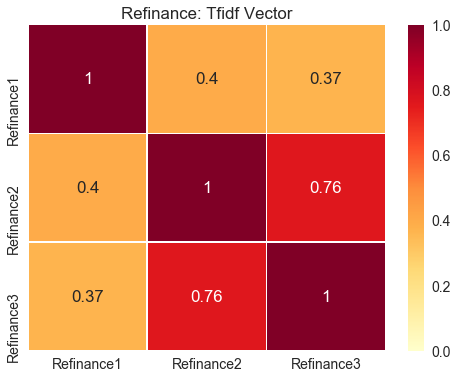

In [27]:
sns.set(font_scale=1.4)
ax1 = sns.heatmap(ref_tfidf, annot=True, linewidths=.5, fmt='.2g', cmap="YlOrRd", vmin=0, vmax=1)
ax1.set_title('Refinance: Tfidf Vector')
ax1.set_xticklabels(['Refinance1','Refinance2','Refinance3'])
ax1.set_yticklabels(['Refinance1','Refinance2','Refinance3'])
sns.set(rc={'figure.figsize':(8,6)})

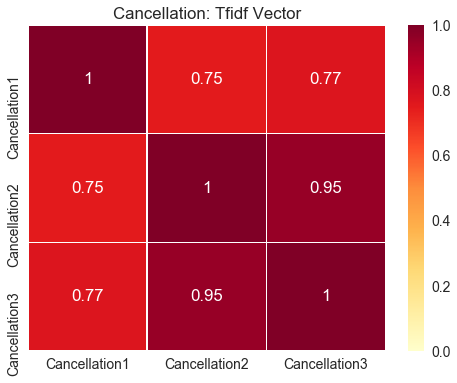

In [28]:
sns.set(font_scale=1.4)
ay1 = sns.heatmap(cancel_tfidf, annot=True, linewidths=.5, fmt='.2g', cmap="YlOrRd", vmin=0, vmax=1)
ay1.set_title('Cancellation: Tfidf Vector')
ay1.set_xticklabels(['Cancellation1','Cancellation2','Cancellation3'])
ay1.set_yticklabels(['Cancellation1','Cancellation2','Cancellation3'])
sns.set(rc={'figure.figsize':(8,6)})

- Advantage:

    - Quick when corpus is small or median

- Limitations:

    - Sparcity (When the corpus is very large), which will slow down the algebra operations.
 
    - Tf-idf matrix based on the word frequency which interprets in the vocabulary level, can't deal with semantic cases. （Can't understand 'no' or 'not') 
    
    - Can't count for word derivations.
    
- Possible Solutions:

    - Use sparse representation to speed up algebra operations by scipy.sparse package

    - Add extra weight to strong negative words like no/not/.. by changing countervector and transforming it to tfidfvector
    
    - Alternatively consider a collection of character n-grams, a representation resilient against misspellings and derivations.
    
             eg. if ngram = 5
            'jumpy fox' => 'jumpy', 'mpy f', 'py fo', 'umpy ', 'y fox'
            
    - HashingVectorizer for large corpus (not recommended)
            

## Word2Vec +  Cos Distance

In [21]:
from gensim.models.keyedvectors import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

model_path_list = ['./word2vec/GoogleNews-vectors-negative300.bin',
                   './word2vec/apnews_sg.tar',
                   './word2vec/apnews_dbow.tar',
                   './word2vec/crawl-300d-2M.vec',
                   './word2vec/glove_6B_100d.txt',
                   './word2vec/glove_6B_200d.txt',
                   './word2vec/glove_6B_300d.txt',
                   './word2vec/glove_6B_50d.txt',
                  ]

# text format
# glove_input_file = model_path_list[6]
# word2vec_output_file = 'word2vec.txt.word2vec'
# glove2word2vec(glove_input_file, word2vec_output_file)
# w2v_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False) 

# bin format
w2v_model = KeyedVectors.load_word2vec_format(model_path_list[0], binary=True) 

In [40]:
class DocSim(object):
    def __init__(self, w2v_model , stopwords=[]):
        self.w2v_model = w2v_model
        self.stopwords = stopwords

    def vectorize(self, doc):
        """Identify the vector values for each word in the given document"""
        doc = doc.lower()
        words = [w for w in doc.split(" ") if w not in self.stopwords]
        word_vecs = []
        for word in words:
            try:
                vec = self.w2v_model[word]
                word_vecs.append(vec)
            except KeyError:
                # Ignore, if the word doesn't exist in the vocabulary
                pass

        # Assuming that document vector is the mean of all the word vectors
        vector = np.mean(word_vecs, axis=0)
        return vector

    def _cosine_sim(self, vecA, vecB):
        """Find the cosine similarity distance between two vectors."""
        csim = np.dot(vecA, vecB) / (np.linalg.norm(vecA) * np.linalg.norm(vecB))
        if np.isnan(np.sum(csim)):
            return 0
        return csim

    def calculate_similarity(self, docs):
        """Calculates & returns similarity scores between documents."""
        length = len(docs)
        res = np.zeros((length, length))
        for i in range(length):
            for j in range(length):
                vec_i = self.vectorize(docs[i])
                vec_j = self.vectorize(docs[j])
                sim_score = self._cosine_sim(vec_i, vec_j)
                res[i][j] = sim_score
        return res

In [47]:
ds = DocSim(w2v_model)
ref_w2v_cos = ds.calculate_similarity(ref)
cancel_w2v_cos = ds.calculate_similarity(cancel)

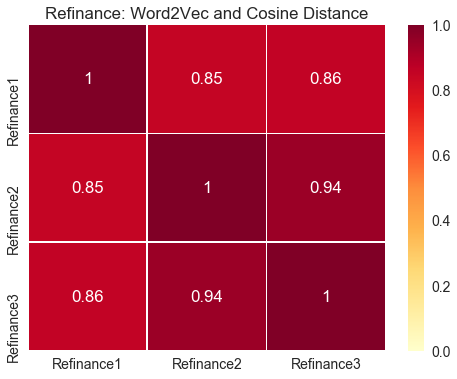

In [48]:
sns.set(font_scale=1.4)
ax2 = sns.heatmap(ref_w2v_cos, annot=True, linewidths=.5, fmt='.2g', cmap="YlOrRd", vmin=0, vmax=1)
ax2.set_title('Refinance: Word2Vec and Cosine Distance')
ax2.set_xticklabels(['Refinance1','Refinance2','Refinance3'])
ax2.set_yticklabels(['Refinance1','Refinance2','Refinance3'])
sns.set(rc={'figure.figsize':(8,6)})

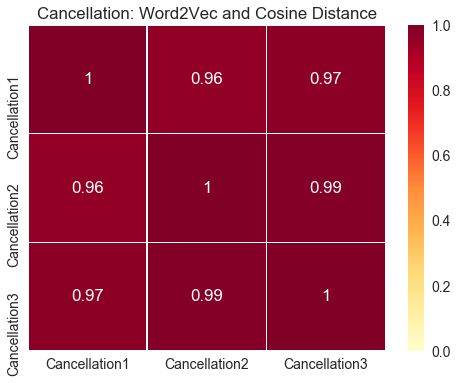

In [49]:
sns.set(font_scale=1.4)
ay2 = sns.heatmap(cancel_w2v_cos, annot=True, linewidths=.5, fmt='.2g', cmap="YlOrRd", vmin=0, vmax=1)
ay2.set_title('Cancellation: Word2Vec and Cosine Distance')
ay2.set_xticklabels(['Cancellation1','Cancellation2','Cancellation3'])
ay2.set_yticklabels(['Cancellation1','Cancellation2','Cancellation3'])
sns.set(rc={'figure.figsize':(8,6)})

- Advantage:

    - Word vector has more explainary power than Tf-idf matrix

- Limitation:
 
    - We use trained word vectors by Google/Facebook/Twitter. These word vectors are trained by daily news which cover a wide range of topics, thus word vectors that related to finance are quite similar. But our indentures focus more on legal and finance words, thus their cosine distrance will be highly close.

- Possible Solution:

    - Train word vectors ourselves by current indentures

## Word2Vec + WMD (Word Mover's Distance)

In [13]:
from pyemd import emd
from gensim.similarities import WmdSimilarity
import gensim.downloader as api

# https://www.diycode.cc/projects/RaRe-Technologies/gensim-data
word_vectors = api.load("glove-wiki-gigaword-300")  # load pre-trained word-vectors from gensim-data

In [14]:
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def normalize(text):
    def stem_tokens(tokens):
        return [stemmer.stem(item) for item in tokens]

    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

In [15]:
ref_w2v_wmd = 1 - result([normalize(text) for text in ref], len(ref), word_vectors.wmdistance)/5
cancel_w2v_wmd = 1 - result([normalize(text) for text in cancel], len(cancel), word_vectors.wmdistance)/5

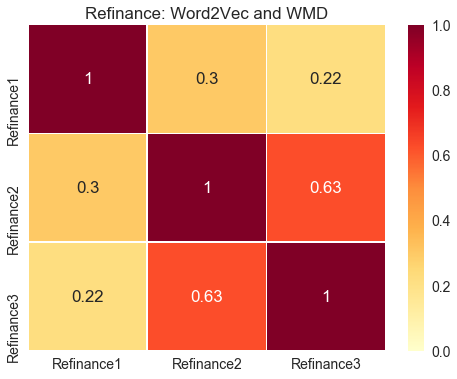

In [16]:
sns.set(font_scale=1.4)
ax3 = sns.heatmap(ref_w2v_wmd, annot=True, linewidths=.5, fmt='.2g', cmap="YlOrRd", vmin=0, vmax=1)
ax3.set_title('Refinance: Word2Vec and WMD')
ax3.set_xticklabels(['Refinance1','Refinance2','Refinance3'])
ax3.set_yticklabels(['Refinance1','Refinance2','Refinance3'])
sns.set(rc={'figure.figsize':(8,6)})

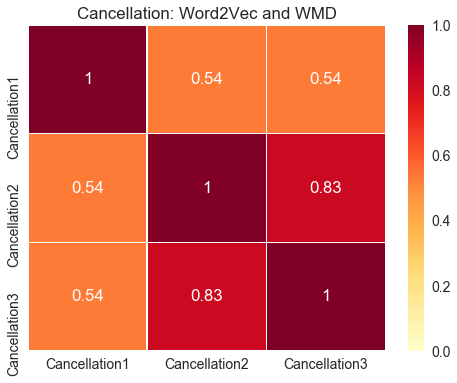

In [17]:
sns.set(font_scale=1.4)
ay3 = sns.heatmap(cancel_w2v_wmd, annot=True, linewidths=.5, fmt='.2g', cmap="YlOrRd", vmin=0, vmax=1)
ay3.set_title('Cancellation: Word2Vec and WMD')
ay3.set_xticklabels(['Cancellation1','Cancellation2','Cancellation3'])
ay3.set_yticklabels(['Cancellation1','Cancellation2','Cancellation3'])
sns.set(rc={'figure.figsize':(8,6)})

- Advantages:

    - Word Mover's Distance add more weight to important words (with high frequency), rather than just perform algebra operations.
    
- Limitatons:

    - limitations in word vectors
    
- Possible Solution:

    - More extentions: Earth Mover Distance (EMD)/ Word Mover’s Distance (WMD)/ Relaxed Word Moving Distance (RWMD)
    
- Mechanism:

   <img src="./WMD.png">
   
   - The assumption is that similar words should have similar vectors.
   - It allows transfer every word from sentence 1 to sentence 2 because algorithm does not know “obama” should transfer to “president”. At the end it will choose the minimum transportation cost to transport every word from sentence 1 to sentence 2.

## Sementic Texture Similarity

In [19]:
import tensorflow as tf
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" 

# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)

INFO:tensorflow:Using /var/folders/df/jdb52f_x5vjcrdf9rqv8gbr00000gn/T/tfhub_modules to cache modules.


In [20]:
def sts(messages):
    similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
    similarity_message_encodings = embed(similarity_input_placeholder)
    
    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        session.run(tf.tables_initializer())
        message_embeddings = session.run(similarity_message_encodings, 
                                         feed_dict={similarity_input_placeholder: messages})
    
    return message_embeddings

In [21]:
ref_sts = np.inner(sts(ref), sts(ref))
cancel_sts = np.inner(sts(cancel), sts(cancel))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


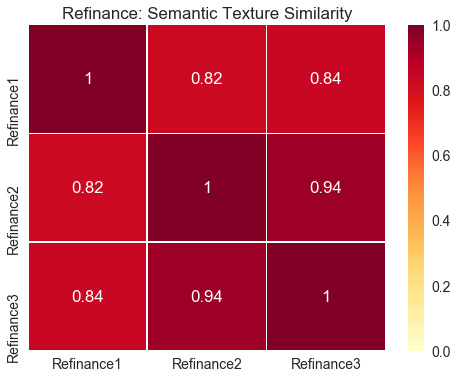

In [22]:
sns.set(font_scale=1.4)
ax4 = sns.heatmap(ref_sts, annot=True, linewidths=.5, fmt='.2g', cmap="YlOrRd", vmin=0, vmax=1)
ax4.set_title('Refinance: Semantic Texture Similarity')
ax4.set_xticklabels(['Refinance1','Refinance2','Refinance3'])
ax4.set_yticklabels(['Refinance1','Refinance2','Refinance3'])
sns.set(rc={'figure.figsize':(8,6)})

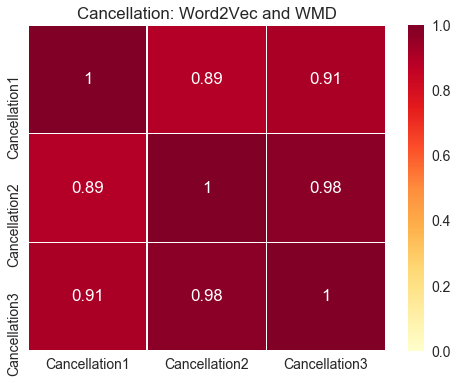

In [23]:
sns.set(font_scale=1.4)
ay4 = sns.heatmap(cancel_sts, annot=True, linewidths=.5, fmt='.2g', cmap="YlOrRd", vmin=0, vmax=1)
ay4.set_title('Cancellation: Word2Vec and WMD')
ay4.set_xticklabels(['Cancellation1','Cancellation2','Cancellation3'])
ay4.set_yticklabels(['Cancellation1','Cancellation2','Cancellation3'])
sns.set(rc={'figure.figsize':(8,6)})

- Advantage:

recent proposed method, used Autoencoder/DNN.

- Limitation:
 
correlations are too close, which lead to high similarity score

- Possible Solution:

try Word Mover's Distance

## Latent Semantic Analysis

Useful for large corpus, could deal with computational expensive cases

Mechanism: 
1. Use SVD to decompose count vector (reduce the number of rows while preserving the similarity structure among columns)
2. Calculate cosine distance between two normalized vectors

In [60]:
from gensim.similarities.docsim import Similarity
from gensim.test.utils import common_corpus, common_dictionary, get_tmpfile
from gensim.models import LsiModel

model = LsiModel(common_corpus[:3], id2word=common_dictionary)  # train model
vector = model[common_corpus[4]]  # apply model to BoW document

model.add_documents(common_corpus[4:])  # update model with new documents
tmp_fname = get_tmpfile("lsi.model")

model.save(tmp_fname)  # save model
loaded_model = LsiModel.load(tmp_fname)  # load model

In [62]:
vector

[(0, 1.061612970626485), (1, 0.6666666666666669), (2, 0.14534802628780424)]